In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
X.shape

(569, 30)

In [5]:
np.unique(y)

array([0, 1])

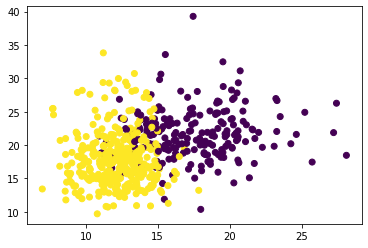

In [6]:
plt.clf()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
Kernel = ['linear','poly','rbf','sigmoid']

for k in Kernel:
    time0 = time()
    clf = SVC(
        kernel=k
        , gamma='auto'
        , degree=1#不然的话多项式跑不动
        , cache_size=5000
    ).fit(X_train,y_train)
    print("The accuracy under kernel %s is %f" % (k,clf.score(X_test,y_test)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.972028
00:00:774513
The accuracy under kernel poly is 0.944056
00:00:021109
The accuracy under kernel rbf is 0.650350
00:00:016272
The accuracy under kernel sigmoid is 0.650350
00:00:007751


In [8]:
import pandas as pd

df = pd.DataFrame(X)
df.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X)
df.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
Kernel = ['linear','poly','rbf','sigmoid']

for k in Kernel:
    time0 = time()
    clf = SVC(
        kernel=k
        , gamma='auto'
        , degree=1#不然的话多项式跑不动
        , cache_size=5000
    ).fit(X_train,y_train)
    print("The accuracy under kernel %s is %f" % (k,clf.score(X_test,y_test)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.944056
00:00:003425
The accuracy under kernel poly is 0.937063
00:00:002632
The accuracy under kernel rbf is 0.972028
00:00:005172
The accuracy under kernel sigmoid is 0.923077
00:00:004941


0.972027972027972 0.0339322177189533


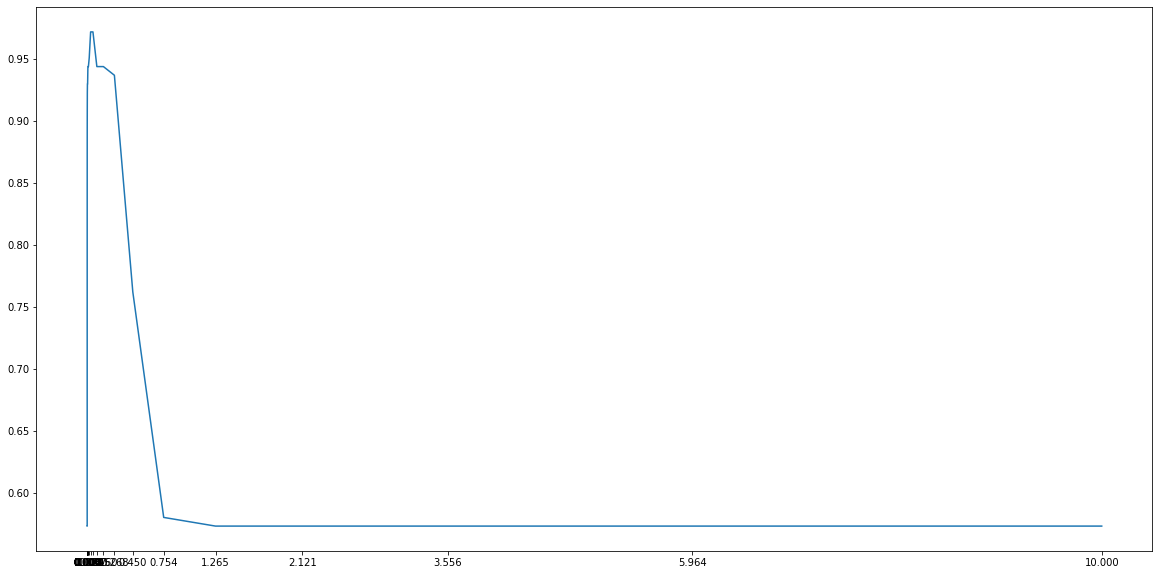

In [11]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
    
print(max(score), gamma_range[score.index(max(score))])
plt.figure(figsize=(20,10))
plt.plot(gamma_range,score)
plt.gca().set_xticks(gamma_range)

plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0 = time()
gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range
                 ,coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000),
param_grid=param_grid, cv=cv)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_,
grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
00:05:774712


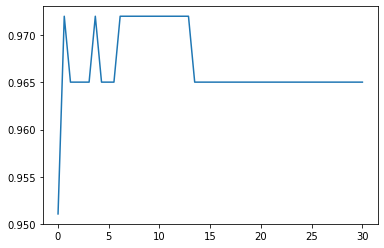

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y)
#调线性核函数
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    #print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9790209790209791 1.2340816326530613


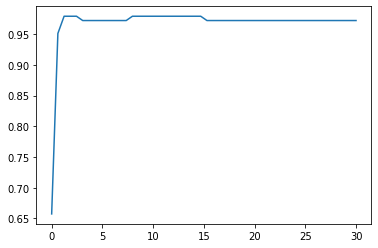

In [14]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma =
0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.972027972027972 5.0


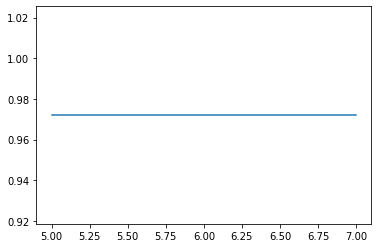

In [15]:
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma =
0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()